In [1]:
"""
Add the zebrafish jaw lib to python path
"""

import os, sys

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), "..", "..")))

In [2]:
"""
The first thing we'll do is read a model from disk - we want to access its config file

"""

from fishjaw.model import model

jaw_model = model.load_model("attempt_3.pkl")
jaw_config = jaw_model.config

In [3]:
"""
We'll fine tune on some quadrates that Wahab segmented - we'll want to read these from the RDSF and crop to the right region of interest

"""

import re
import pathlib

import tifffile
import numpy as np
from tqdm import tqdm

wahab_labels = (
    jaw_config["rdsf_dir"]
    / pathlib.Path("1Felix and Rich make models/Training dataset Tiffs/Training set 1")
).glob("*.tif")

# Remove these ones, since the 3D tifs dont exist
bad_labels = re.compile(r"(351|401|420|441)")
wahab_labels = [label for label in wahab_labels if not bad_labels.search(label.name)]

# Read the labels
wahab_labels = [tifffile.imread(path) for path in tqdm(wahab_labels)]

quadrate_labels = [(l == 4) | (l == 5)  for l in tqdm(wahab_labels)]

100%|██████████| 12/12 [00:04<00:00,  2.59it/s]


In [7]:
"""
Find the centre of the quadrates and crop the labels

"""
from scipy.ndimage import center_of_mass

centroids = [tuple(round(x) for x in center_of_mass(label)) for label in tqdm(quadrate_labels[:2])]


100%|██████████| 12/12 [00:58<00:00,  4.87s/it]


In [13]:
"""
Crop the centroids out using the right window size
"""
from fishjaw.images import transform

window_size = transform.window_size(jaw_config)
cropped = [transform.crop(l, c, window_size, centred=True) for l, c in zip(quadrate_labels[:2], centroids)]

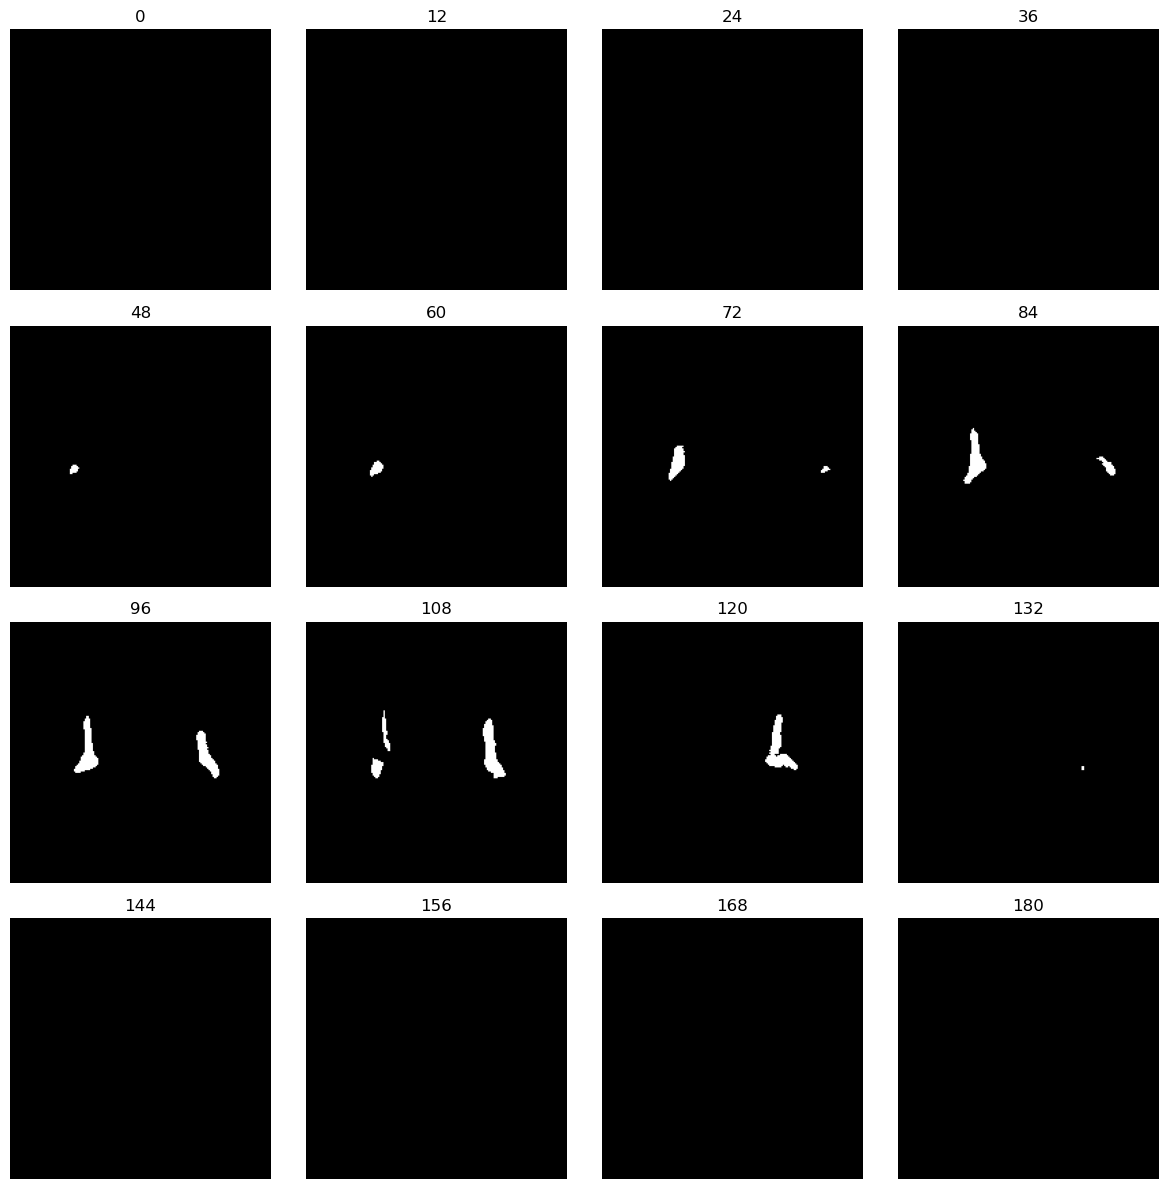

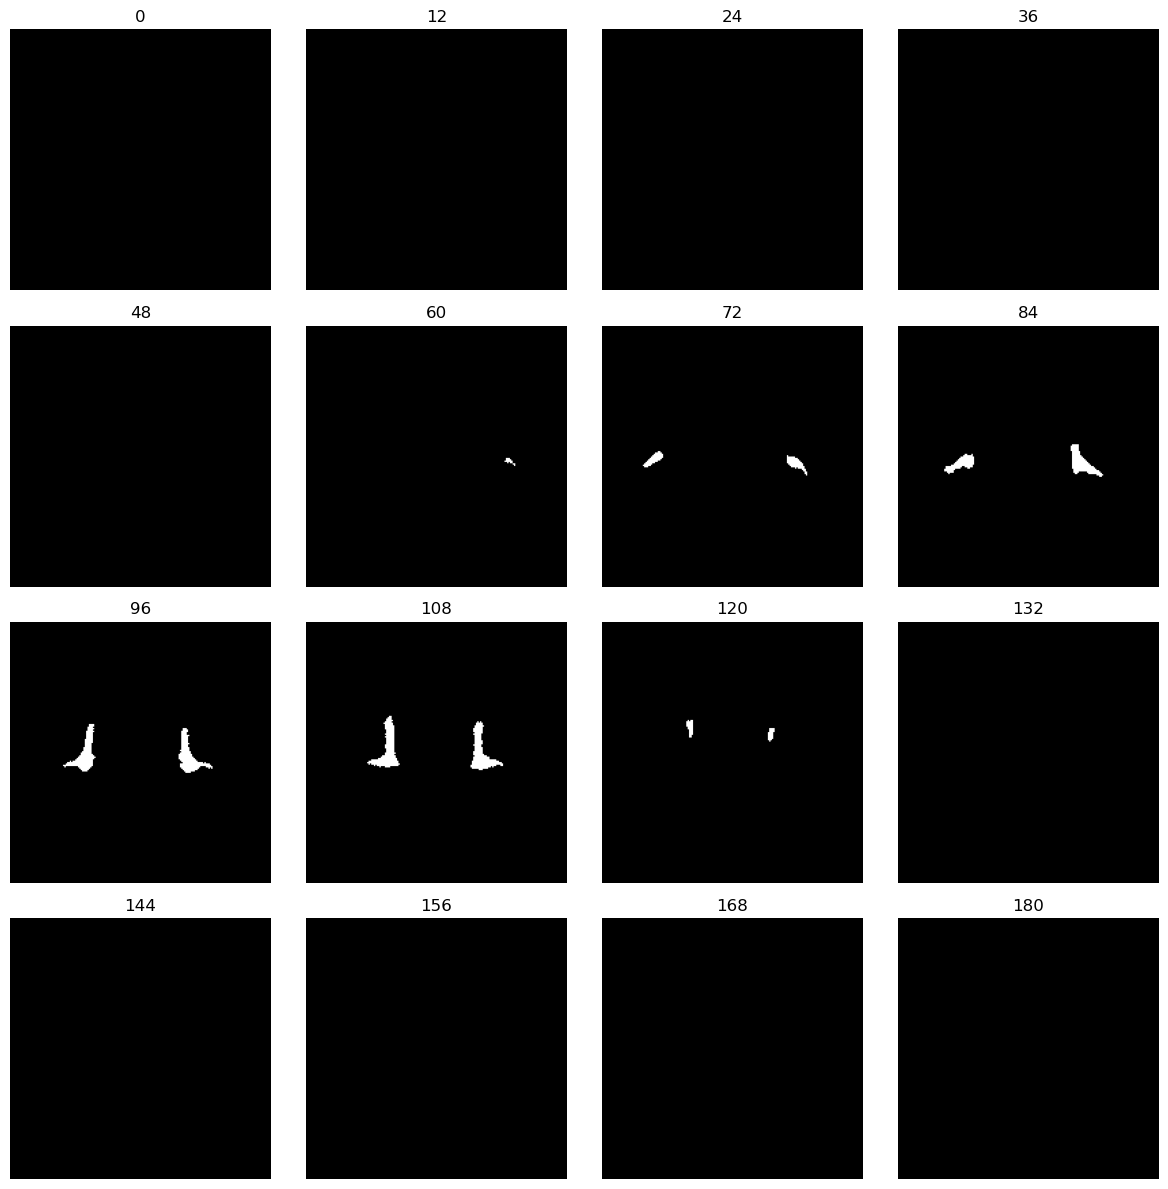

In [15]:
centroids
from fishjaw.visualisation import images_3d

for l in cropped:
    images_3d.plot_slices(
       l 
    )

In [ ]:
"""
Plot the jaws and labels just to check

"""
from fishjaw